In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from statistics import mean

In [7]:
experiment_results = {
    'elastic' : {
        '0.15': [0.597,0.639,0.554,0.682,0.531],
        '0.20': [0.565,0.544,0.574,0.545,0.592],
        '0.30': [1.162,1.244,1.080,1.328,1.036],
        '0.40': [1.113,1.073,1.130,1.075,1.166],
        '0.45': [1.765,1.885,1.640,2.021,1.577],
        '0.50': [1.402,1.350,1.421,1.352,1.466],
        '0.60': [2.343,2.500,2.179,2.685,2.097],
        '0.65': [1.822,1.753,1.845,1.756,1.903]
    },
    'electromagnet': {
        '0.15': [0.351,0.353,0.355,0.355,0.354],
        '0.20': [0.464,0.461,0.464,0.468,0.468],
        '0.30': [0.688,0.692,0.698,0.698,0.687],
        '0.40': [0.911,0.908,0.913,0.922,0.920],
        '0.45': [1.043,1.050,1.058,1.072,1.056],
        '0.50': [1.146,1.144,1.150,1.162,1.157],
        '0.60': [1.391,1.399,1.410,1.476,1.409],
        '0.65': [1.490,1.488,1.496,1.511,1.505]
    }
}

In [17]:
def calculate_means(experiment_results):
    experiment_res_mean = {}
    for experiment_type, experiment_values in experiment_results.items():
        experiment_res_mean[experiment_type] = {}
        for S, T in experiment_values.items():
            experiment_res_mean[experiment_type][S] = round(mean(T), 3)
    return experiment_res_mean

In [18]:
experiment_res_mean = calculate_means(
    experiment_results=experiment_results
    )

experiment_res_mean

{'elastic': {'0.15': 0.601,
  '0.20': 0.564,
  '0.30': 1.17,
  '0.40': 1.111,
  '0.45': 1.778,
  '0.50': 1.398,
  '0.60': 2.361,
  '0.65': 1.816},
 'electromagnet': {'0.15': 0.354,
  '0.20': 0.465,
  '0.30': 0.693,
  '0.40': 0.915,
  '0.45': 1.056,
  '0.50': 1.152,
  '0.60': 1.417,
  '0.65': 1.498}}

In [24]:
np.array(experiment_res_mean['elastic'].values())

array(dict_values([0.601, 0.564, 1.17, 1.111, 1.778, 1.398, 2.361, 1.816]),
      dtype=object)

In [29]:

def plot_chart(title, label_x, label_y, position, time_measurements):
    slope, intercept, r_value, p_value, std_err = linregress(time_measurements, position)

    regression_line = slope * time_measurements + intercept

    print(f"Velocity (slope): {slope:.2f} m/s")
    print(f"Initial position (intercept): {intercept:.2f} m")
    print(f"R-squared: {r_value**2:.4f}")

    plt.figure(figsize=(8, 5))
    plt.scatter(time_measurements, position, color='blue', label='Measured positions')
    plt.plot(time_measurements, regression_line, color='red', label=f'Regression line: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Velocity (slope): 0.26 m/s
Initial position (intercept): 0.05 m
R-squared: 0.8178


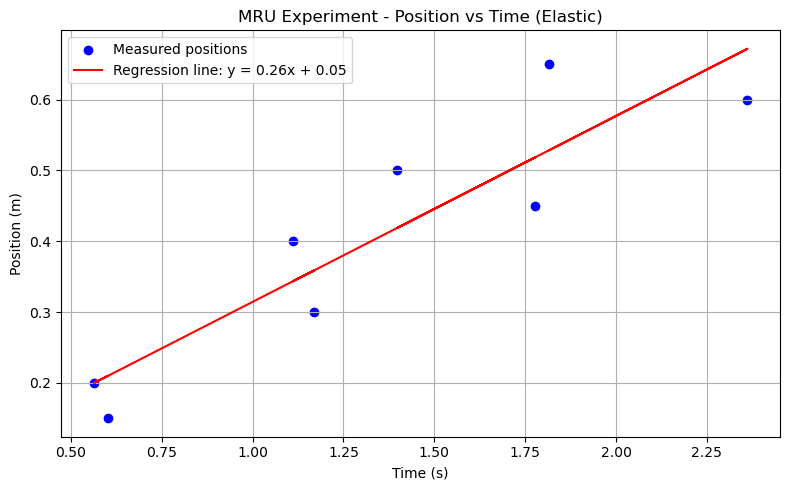

In [31]:
position = np.array([0.15, 0.20, 0.30, 0.40, 0.45, 0.50, 0.60, 0.65])
title = 'MRU Experiment - Position vs Time (Elastic)'
label_x = 'Time (s)'
label_y = 'Position (m)'

plot_chart(
    title=title,
    label_x=label_x,
    label_y=label_y,
    position=position,
    time_measurements=np.array(list(experiment_res_mean['elastic'].values()))
)

Velocity (slope): 0.43 m/s
Initial position (intercept): 0.00 m
R-squared: 0.9991


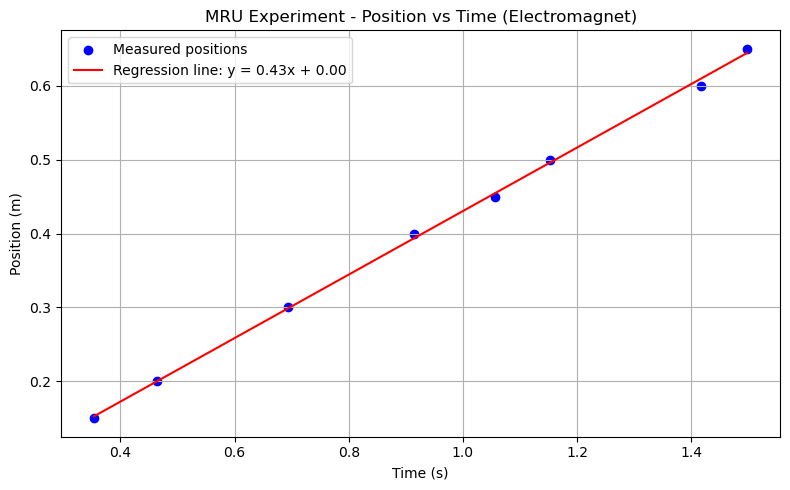

In [33]:
position = np.array([0.15, 0.20, 0.30, 0.40, 0.45, 0.50, 0.60, 0.65])
title = 'MRU Experiment - Position vs Time (Electromagnet)'
label_x = 'Time (s)'
label_y = 'Position (m)'

plot_chart(
    title=title,
    label_x=label_x,
    label_y=label_y,
    position=position,
    time_measurements=np.array(list(experiment_res_mean['electromagnet'].values()))
)

In [37]:
def plot_chart_with_subplots(ax, title, label_x, label_y, position, time_measurements):
    slope, intercept, r_value, p_value, std_err = linregress(time_measurements, position)

    regression_line = slope * time_measurements + intercept

    print(f"Velocity (slope): {slope:.2f} m/s")
    print(f"Initial position (intercept): {intercept:.2f} m")
    print(f"R-squared: {r_value**2:.4f}")

    ax.scatter(time_measurements, position, color='blue', label='Measured positions')
    ax.plot(time_measurements, regression_line, color='red', label=f'Regression line: y = {slope:.2f}x + {intercept:.2f}')
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

Velocity (slope): 0.26 m/s
Initial position (intercept): 0.05 m
R-squared: 0.8178


KeyError: 'ellectromagnet'

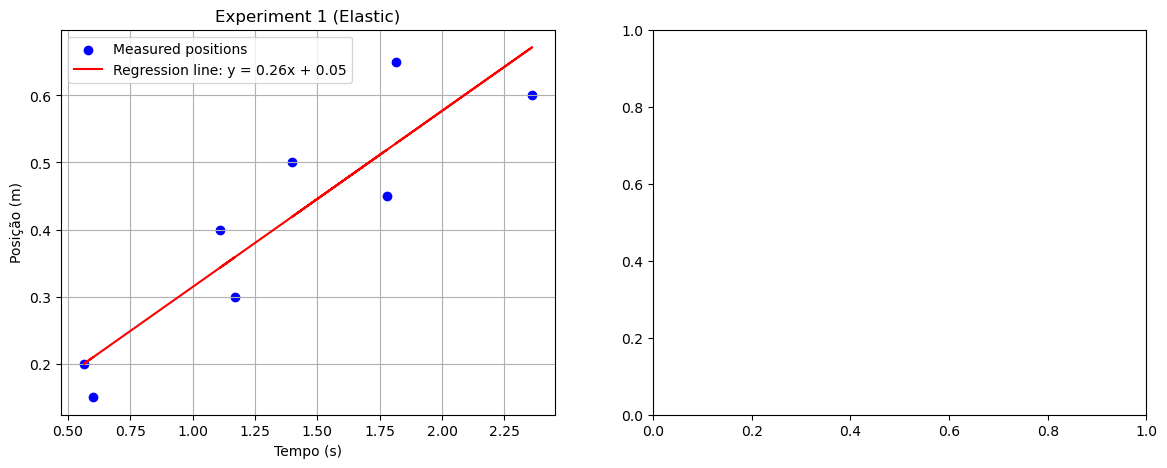

In [ ]:
position = np.array([0.15, 0.20, 0.30, 0.40, 0.45, 0.50, 0.60, 0.65])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

plot_chart_with_subplots(ax1, 'Experiment 1 (Elastic)', 'Tempo (s)', 'Posição (m)', position, np.array(list(experiment_res_mean['elastic'].values())))
plot_chart_with_subplots(ax2, 'Experiment 2 (Electromagnet)', 'Tempo (s)', 'Posição (m)', position, np.array(list(experiment_res_mean['electromagnet'].values())))

plt.tight_layout()
plt.show()
